# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-9-113-A,103.870073,0.018827,1284.443498,0.018019,202.680903,1284.443498,635.873448,1.301165,3.173389,...,1.288914,0.672888,0.012840,1.096774,1.166154,0.167341,0.003613,PseudoVoigtModel,PseudoVoigtModel,No
1,187-9-114-A-rep1,103.436254,0.010727,1285.482758,0.010244,193.408180,1285.482758,372.908532,0.732409,1.965611,...,1.001653,0.115093,0.007574,1.119632,1.075431,0.137872,0.003036,PseudoVoigtModel,PseudoVoigtModel,No
2,187-9-114-A-rep2,103.441254,0.009822,1285.481305,0.008632,198.817582,1285.481305,376.427863,0.712140,2.081283,...,1.056637,0.006609,0.007164,1.124611,1.071895,0.141646,0.002944,PseudoVoigtModel,PseudoVoigtModel,No
3,187-9-114-A-rep3,103.450616,0.009183,1285.478941,0.007920,194.828297,1285.478941,374.753538,0.705878,1.902608,...,1.070175,0.061829,0.007246,1.108504,1.060797,0.128982,0.003183,PseudoVoigtModel,PseudoVoigtModel,No
4,187-9-115-A,103.210520,0.011508,1286.024083,0.010107,131.936933,1286.024083,198.124607,0.595525,1.635783,...,1.037578,0.137837,0.009027,1.213523,1.224932,0.202989,0.004006,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'04 FG19-101-A-50X.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 80/80 [00:13<00:00,  5.79it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG19-101-A-rep1.txt,"May 6, 2024\n",May,6.0,6.020,45.0,5.0,50.0,"['0h', '3m', '46s']",1:23:39 PM\n,48219.0,1324.767
1,FG19-101-A-rep2.txt,"May 6, 2024\n",May,6.0,6.026,45.0,5.0,50.0,"['0h', '3m', '46s']",1:27:53 PM\n,48473.0,1324.767
2,FG19-101-A-rep3.txt,"May 6, 2024\n",May,6.0,6.036,45.0,5.0,50.0,"['0h', '3m', '46s']",1:37:07 PM\n,49027.0,1324.767
3,187-9-113-A.txt,"May 6, 2024\n",May,6.0,6.064,60.0,4.0,50.0,"['0h', '4m', '2s']",2:02:22 PM\n,50542.0,1324.767
4,Nr5.txt,"May 6, 2024\n",May,6.0,6.005,45.0,3.0,100.0,"['0h', '2m', '17s']",2:28:43 PM\n,52123.0,1324.767


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG19-101-A-rep1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG19-101-A-rep1', 'FG19-101-A-rep2', 'FG19-101-A-rep3',
       '187-9-113-A', 'Nr5', '187-9-114-A-rep1', '187-9-114-A-rep2',
       '187-9-114-A-rep3', '187-9-115-A', '186-11-121-A', '186-11-121-B',
       '186-11-121-C', '186-11-121-D-rep1', '186-11-121-E',
       '186-11-121-D-rep2', '186-11-122-A', '186-11-122-B',
       '186-11-122-C-rep1', '186-11-122-C-rep2', '187-9-116-A',
       '187-9-116-B-rep1', '187-9-116-B-rep2', '187-9-116-B-rep3',
       '187-9-117-A', '187-9-119-A', '187-9-120-A', 'FG19-101-A-rep4',
       'FG19-101-A-rep5', 'FG19-101-A-rep6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-113-A


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-113-A', '187-9-114-A-rep1', '187-9-114-A-rep2',
       '187-9-114-A-rep3', '187-9-115-A', '186-11-122-C-rep1',
       '186-11-122-C-rep2', '187-9-116-B-rep1', '187-9-116-B-rep2',
       '187-9-116-B-rep3', '187-9-119-A', '186-11-121-A', '186-11-121-B',
       '186-11-121-C', '186-11-121-D-rep1', '186-11-121-E',
       '186-11-121-D-rep2', '186-11-122-A', '186-11-122-B', '187-9-116-A',
       '187-9-117-A', '187-9-120-A', 'FG19-101-A-rep1', 'FG19-101-A-rep2',
       'FG19-101-A-rep3', 'FG19-101-A-rep4', 'FG19-101-A-rep5',
       'FG19-101-A-rep6'], dtype='<U17')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-113-A,103.870073,0.018827,1284.443498,0.018019,202.680903,1284.443498,635.873448,1.301165,3.173389,...,May,6.0,6.064,60.0,4.0,50.0,"['0h', '4m', '2s']",2:02:22 PM\n,50542.0,1324.767
1,187-9-114-A-rep1,103.436254,0.010727,1285.482758,0.010244,193.408180,1285.482758,372.908532,0.732409,1.965611,...,May,6.0,6.015,60.0,4.0,100.0,"['0h', '4m', '2s']",2:31:30 PM\n,52290.0,1324.767
2,187-9-114-A-rep2,103.441254,0.009822,1285.481305,0.008632,198.817582,1285.481305,376.427863,0.712140,2.081283,...,May,6.0,6.014,60.0,4.0,100.0,"['0h', '4m', '1s']",2:36:23 PM\n,52583.0,1324.767
3,187-9-114-A-rep3,103.450616,0.009183,1285.478941,0.007920,194.828297,1285.478941,374.753538,0.705878,1.902608,...,May,6.0,6.026,60.0,4.0,100.0,"['0h', '4m', '1s']",2:42:26 PM\n,52946.0,1324.767
4,187-9-115-A,103.210520,0.011508,1286.024083,0.010107,131.936933,1286.024083,198.124607,0.595525,1.635783,...,May,6.0,6.036,60.0,4.0,100.0,"['0h', '4m', '1s']",2:54:48 PM\n,53688.0,1324.767


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.550239320737857e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-11-121-A,0.423520,0.003126,0.002063,0.002349,103.767103,0.004611,0.000856,0.004540,6.042,...,NaN,NaN,NaN,NaN,NaN,NaN,54808.0,0.997924,0.997916,0.997933
1,186-11-121-B,0.336635,0.003349,0.002387,0.002350,103.569091,0.005543,0.000855,0.005488,6.045,...,NaN,NaN,NaN,NaN,NaN,NaN,55118.0,0.997924,0.997915,0.997932
2,186-11-121-C,0.324272,0.003129,0.002066,0.002350,103.540312,0.004823,0.000856,0.004756,6.047,...,NaN,NaN,NaN,NaN,NaN,NaN,55459.0,0.997923,0.997914,0.997931
3,186-11-121-D-rep1,0.361226,0.003343,0.002379,0.002349,103.625895,0.005466,0.000858,0.005410,6.046,...,NaN,NaN,NaN,NaN,NaN,NaN,55746.0,0.997922,0.997914,0.997930
4,186-11-121-D-rep2,0.350216,0.003014,0.001888,0.002349,103.600535,0.004360,0.000861,0.004283,6.048,...,NaN,NaN,NaN,NaN,NaN,NaN,56338.0,0.997920,0.997912,0.997929


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

8.550239320737857e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-11-121-A,0.423520,0.003126,0.002063,0.002349,103.767103,0.004611,0.000856,0.004540,6.042,...,NaN,NaN,NaN,NaN,NaN,NaN,54808.0,0.997924,0.997916,0.997933
1,186-11-121-B,0.336635,0.003349,0.002387,0.002350,103.569091,0.005543,0.000855,0.005488,6.045,...,NaN,NaN,NaN,NaN,NaN,NaN,55118.0,0.997924,0.997915,0.997932
2,186-11-121-C,0.324272,0.003129,0.002066,0.002350,103.540312,0.004823,0.000856,0.004756,6.047,...,NaN,NaN,NaN,NaN,NaN,NaN,55459.0,0.997923,0.997914,0.997931
3,186-11-121-D-rep1,0.361226,0.003343,0.002379,0.002349,103.625895,0.005466,0.000858,0.005410,6.046,...,NaN,NaN,NaN,NaN,NaN,NaN,55746.0,0.997922,0.997914,0.997930
4,186-11-121-D-rep2,0.350216,0.003014,0.001888,0.002349,103.600535,0.004360,0.000861,0.004283,6.048,...,NaN,NaN,NaN,NaN,NaN,NaN,56338.0,0.997920,0.997912,0.997929


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_May 6, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

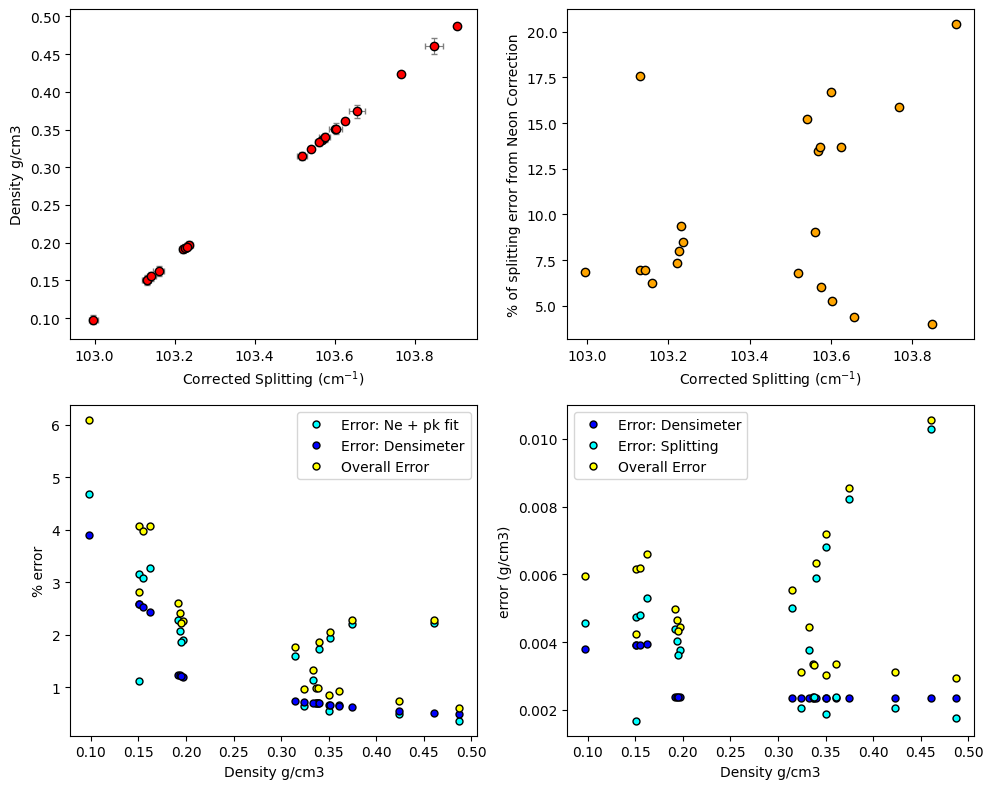

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

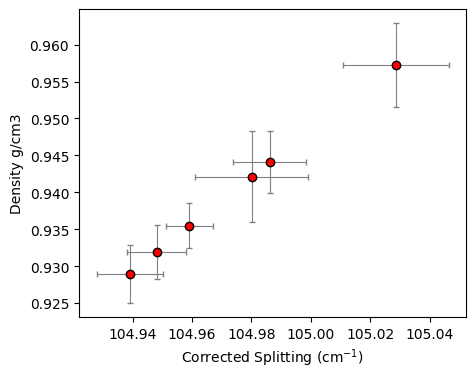

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [23]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

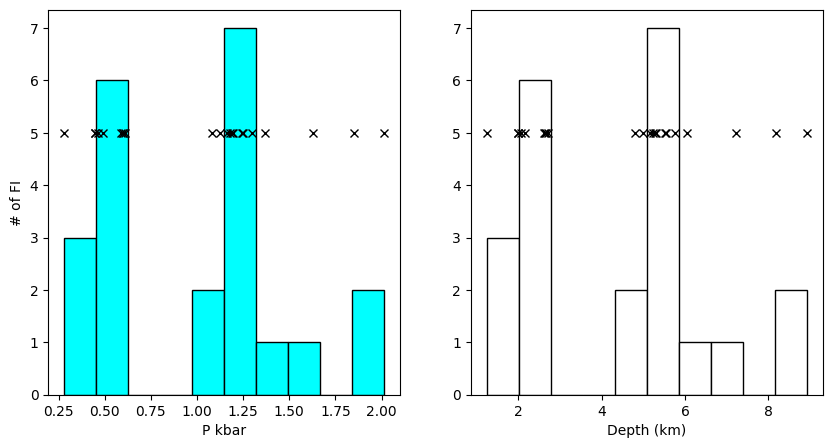

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()